In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def use_gpu():
    torch.set_default_tensor_type(torch.cuda.FloatTensor if torch.cuda.is_available() 
                                                         else torch.FloatTensor)
use_gpu()

In [3]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print('Train Epoch: {}, Loss: {:.3f}'.format(epoch, loss.item()))


def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    total = len(test_loader.dataset)
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('Average loss: {:.3f}, Test Acc: {:.3f} ({}/{})'.format(test_loss, 100.*correct/total, correct, total))


In [4]:
batch_size = 64
test_batch_size = 1000
epochs = 20
criterion = nn.CrossEntropyLoss()

trainset = datasets.FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ]))
testset = datasets.FashionMNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor()
                   ]))
train_loader = torch.utils.data.DataLoader(trainset,batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset,batch_size=test_batch_size, shuffle=True)

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw


Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


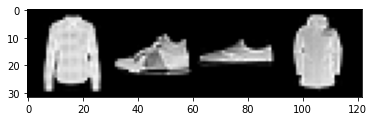

Shirt Sneaker Sneaker Coat


In [5]:
classes = ('T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt',
            'Sneaker','Bag','Ankle Boot')

def imshow(image):
    np_image = image.numpy()
    plt.imshow(np.transpose(np_image,(1,2,0)))
    plt.show()

images,labels = next(iter(train_loader))
imshow(utils.make_grid(images[0:4]))
print(' '.join(classes[labels[j]] for j in range(4)))

In [6]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.dense_layers = nn.Sequential(
                     nn.Flatten(),
                     nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 10)
        )

    def forward(self, x):
        if torch.cuda.is_available():
            x = x.to(device="cuda")
        out = self.dense_layers(x)
        return out

model = MLP()
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(1, epochs + 1):
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)

Train Epoch: 1, Loss: 0.285
Average loss: 0.000, Test Acc: 84.430 (8443/10000)
Train Epoch: 2, Loss: 0.303
Average loss: 0.000, Test Acc: 86.020 (8602/10000)
Train Epoch: 3, Loss: 0.089
Average loss: 0.000, Test Acc: 86.600 (8660/10000)
Train Epoch: 4, Loss: 0.582
Average loss: 0.000, Test Acc: 86.260 (8626/10000)
Train Epoch: 5, Loss: 0.357
Average loss: 0.000, Test Acc: 87.030 (8703/10000)
Train Epoch: 6, Loss: 0.457
Average loss: 0.000, Test Acc: 87.780 (8778/10000)
Train Epoch: 7, Loss: 0.232
Average loss: 0.000, Test Acc: 87.550 (8755/10000)
Train Epoch: 8, Loss: 0.345
Average loss: 0.000, Test Acc: 87.590 (8759/10000)
Train Epoch: 9, Loss: 0.084
Average loss: 0.000, Test Acc: 87.980 (8798/10000)
Train Epoch: 10, Loss: 0.354
Average loss: 0.000, Test Acc: 88.410 (8841/10000)
Train Epoch: 11, Loss: 0.236
Average loss: 0.000, Test Acc: 87.690 (8769/10000)
Train Epoch: 12, Loss: 0.414
Average loss: 0.000, Test Acc: 88.440 (8844/10000)
Train Epoch: 13, Loss: 0.156
Average loss: 0.000,

In [7]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_1 = nn.Conv2d(1, 4, 4, padding=1,stride=2)
        self.conv_2 = nn.Conv2d(4, 16, 4, padding=1,stride=2)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(49*16, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        if torch.cuda.is_available():
            x = x.to(device="cuda")
        x = F.relu(self.conv_1(x))
        x = F.relu(self.conv_2(x))
        x = self.flatten(x)
        x = F.relu(self.fc(x))
        out = self.fc2(x)
        return out

model = CNN()
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(1, epochs + 1):
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)


Train Epoch: 1, Loss: 0.330
Average loss: 0.000, Test Acc: 83.540 (8354/10000)
Train Epoch: 2, Loss: 0.339
Average loss: 0.000, Test Acc: 86.000 (8600/10000)
Train Epoch: 3, Loss: 0.398
Average loss: 0.000, Test Acc: 87.330 (8733/10000)
Train Epoch: 4, Loss: 0.408
Average loss: 0.000, Test Acc: 87.960 (8796/10000)
Train Epoch: 5, Loss: 0.436
Average loss: 0.000, Test Acc: 88.330 (8833/10000)
Train Epoch: 6, Loss: 0.104
Average loss: 0.000, Test Acc: 89.440 (8944/10000)
Train Epoch: 7, Loss: 0.089
Average loss: 0.000, Test Acc: 88.820 (8882/10000)
Train Epoch: 8, Loss: 0.223
Average loss: 0.000, Test Acc: 89.920 (8992/10000)
Train Epoch: 9, Loss: 0.129
Average loss: 0.000, Test Acc: 90.010 (9001/10000)
Train Epoch: 10, Loss: 0.163
Average loss: 0.000, Test Acc: 88.990 (8899/10000)
Train Epoch: 11, Loss: 0.242
Average loss: 0.000, Test Acc: 90.000 (9000/10000)
Train Epoch: 12, Loss: 0.204
Average loss: 0.000, Test Acc: 89.640 (8964/10000)
Train Epoch: 13, Loss: 0.093
Average loss: 0.000,